<a href="https://colab.research.google.com/github/hpylieva/abc/blob/main/%D0%94%D0%B5%D0%BD%D1%8C_2_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Візуалізація даних

У цьому уроці навчимось будувати візуалізації з Python.
Для початку маємо замаунтити наш диск і прописати шлях до даних. Дані використовуємо ті самі.

In [8]:
import pandas as pd

# замість мого шляху до файлу, вставте свій!
df = pd.read_csv('/content/drive/MyDrive/Python for DA/МК Python/3.0/Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Зробимо трансформацію кількох колонок для зручності.

In [13]:
str(int(17850.0))

'17850'

In [4]:
df.CustomerID.fillna(0).astype(int).astype(str)

135080

In [11]:
type(17850.)

float

In [5]:
df.CustomerID = df.CustomerID.fillna(00000).astype(int).astype(str)

In [17]:
df['TotalValue'] = df.Quantity * df.UnitPrice

In [21]:
type(df['InvoiceDate'].iloc[0])

str

In [22]:
df['InvoiceDatetime'] = pd.to_datetime(df['InvoiceDate'])

In [28]:
df['InvoiceDatetime'].iloc[0]

Timestamp('2010-12-01 08:26:00')

In [29]:
df['InvoiceDate'] = df['InvoiceDatetime'].dt.date

In [30]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue,InvoiceDatetime
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,2010-12-01 08:26:00


In [34]:
df.shape

(541909, 10)

## Лінійний графік
Побудуємо графік середніх продажів поденно. Що для цього потрібно зробити?
.  
.  
.  
.  
.  
.  
.  
.  
Згрупувати дані і порахувати суму за кожен день!
Інакше графік буде не поденний, а з точкою на час кожної транзакції - це не те, що ми хочемо отримати.  

**Принцип програмування**: спочатку думаємо, що ми хочемо отримати, потім пишемо код.

In [31]:
grouped_by_date = df.groupby('InvoiceDate')['TotalValue']

In [38]:
grouped_by_date

Насправді графіки ми можемо будувати і просто з Pandas!

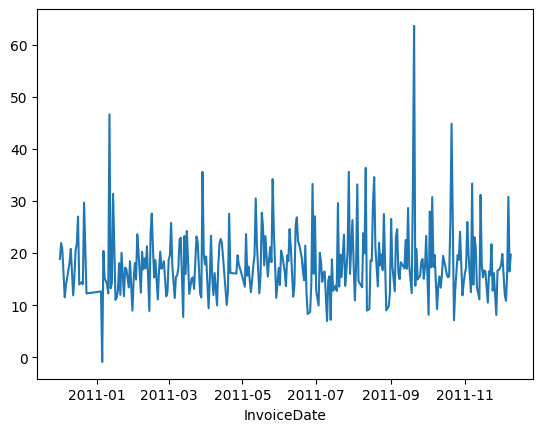

In [41]:
grouped_by_date.mean().plot();

**Завдання 1**:
Побудуйте з використанням наявних змінних лінійний графік **загальної суми** покупок поденно.

<details>
<summary>Натисніть тут аби побачити розвʼязок</summary>

```python
grouped_by_date.sum().plot();
```
</details>

Нам може бути цікаво дослідити максимальне значення транзакцій і це ми легко можемо зробити.

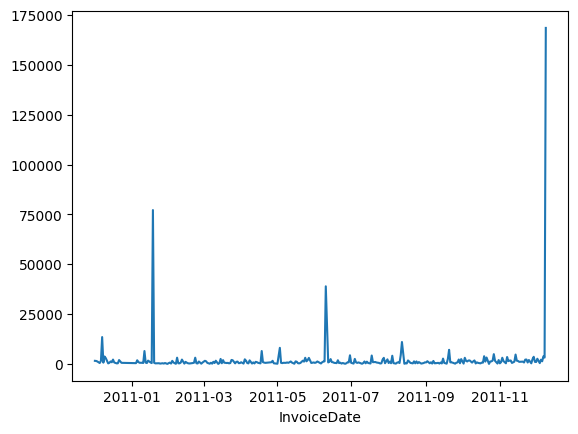

In [44]:
grouped_by_date.max().plot();

Бачимо, що там була якась величезна кількість транзакцій в останній день набору даних. Я б дослідила, чому так, адже ця аномалія достатньо значна. Можна це зробити наприклад, дослідивши останній день через фільтр, і чому там такий великий максимум.

In [ ]:
'2011-09-12', '2011-09-30', '2012-11-01'

In [45]:
df.InvoiceDate.max()

datetime.date(2011, 12, 9)

In [46]:
df[df.InvoiceDate==df.InvoiceDate.max()].sort_values('TotalValue')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue,InvoiceDatetime
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09,2.08,16446.0,United Kingdom,-168469.60,2011-12-09 09:27:00
541541,C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom,-224.69,2011-12-09 10:28:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom,-54.75,2011-12-09 11:57:00
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09,1.95,14397.0,United Kingdom,-23.40,2011-12-09 09:57:00
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom,-9.13,2011-12-09 09:57:00
...,...,...,...,...,...,...,...,...,...,...
541702,581566,23404,HOME SWEET HOME BLACKBOARD,144,2011-12-09,3.26,18102.0,United Kingdom,469.44,2011-12-09 11:50:00
540425,581485,20749,ASSORTED COLOUR MINI CASES,84,2011-12-09,6.35,17389.0,United Kingdom,533.40,2011-12-09 09:38:00
540908,581492,DOT,DOTCOM POSTAGE,1,2011-12-09,933.17,NaN,United Kingdom,933.17,2011-12-09 10:03:00
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09,1714.17,NaN,United Kingdom,1714.17,2011-12-09 10:26:00



Є ще одна біблітека, яка дозвляє побудувати лінійний графік - seaborn.

In [47]:
import seaborn as sns

In [ ]:
!pip install seaborn

Документація до методу для побудови лінійного графіку:
https://seaborn.pydata.org/generated/seaborn.lineplot.html

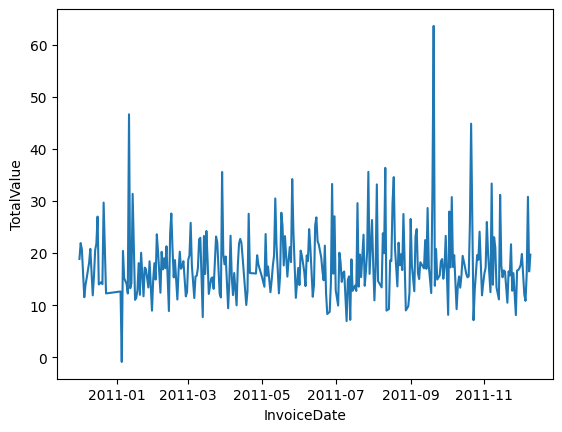

In [48]:
sns.lineplot(data=df, x='InvoiceDate', y='TotalValue', errorbar=None);

У seaborn можемо передавати дані не агреговані, і фукнція lineplot побудує нам графік середнього з довірчим інтервалом. Я приховала довірчий інтервал тут, аби графік був "чистіший", адже з ним картинка буде натсупною через значні аномалії.

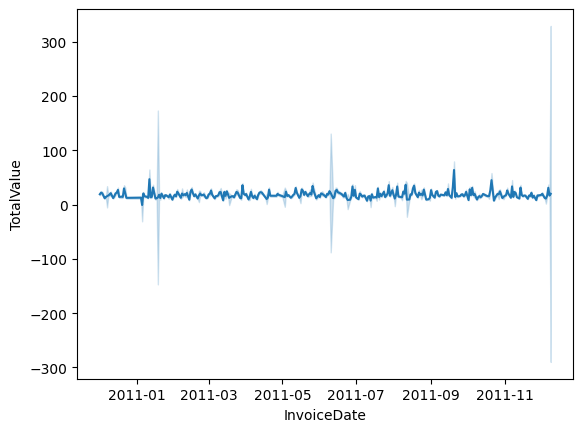

In [49]:
sns.lineplot(data=df, x='InvoiceDate', y='TotalValue');

**Завдання 2**:
Побудуйте з використанням seaborn лінійний графік UnitPrice поденно. Які висновки можна зробити з цього графіку?

<details>
<summary>Натисніть тут аби побачити розвʼязок</summary>

```python
sns.lineplot(data=df, x='InvoiceDate', y='UnitPrice');
```
</details>

# Гістограма
Гістограма - це графік, який демонструє розподіл даних, тобто скільки значень зосереджено в кожному діапазоні значень.

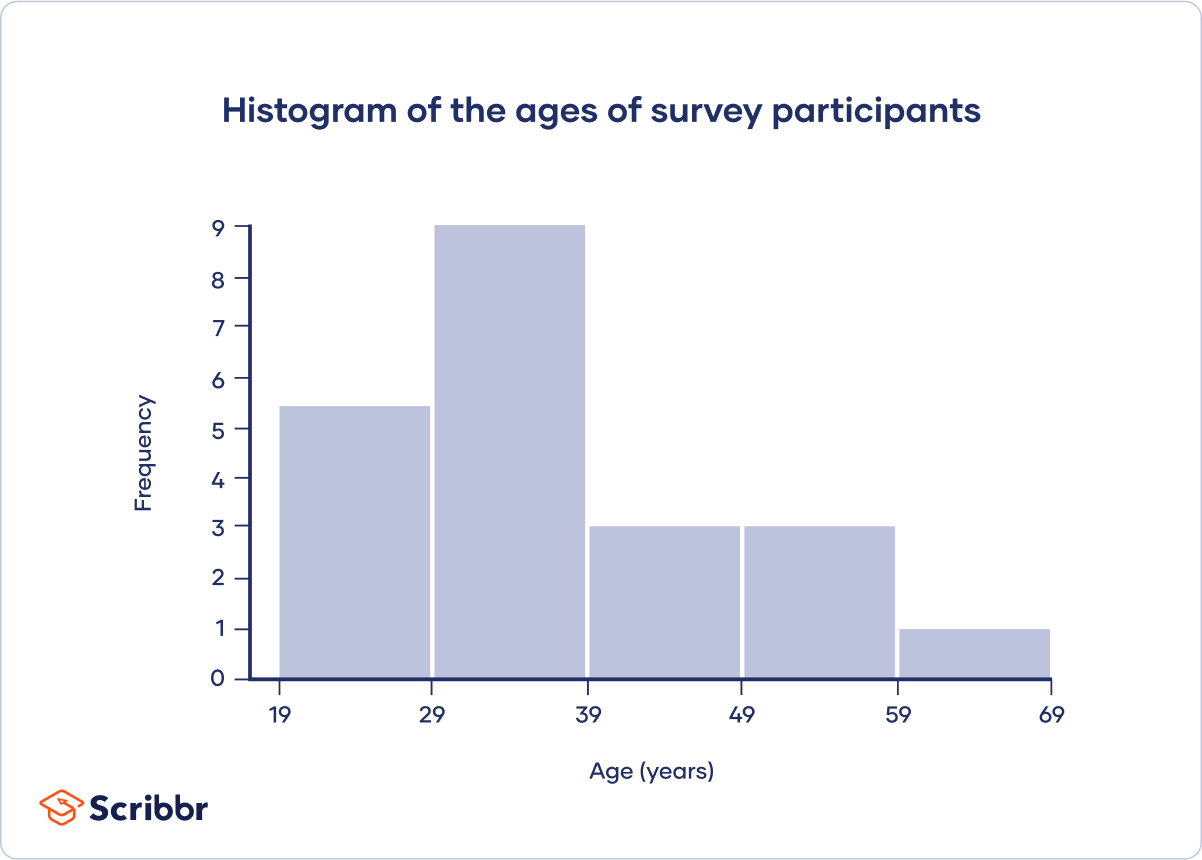

Побудуємо гістограму цін на товари в наборі даних в United Kingdom.

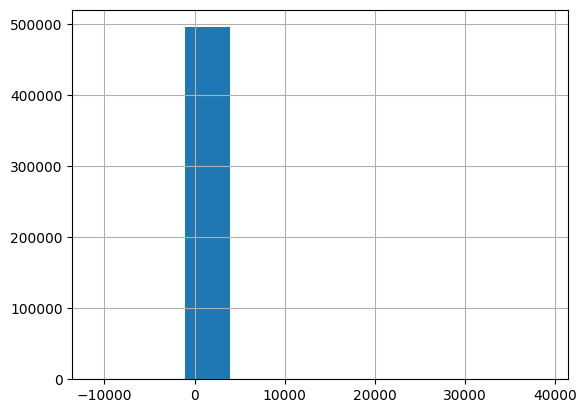

In [67]:
df[df.Country=='United Kingdom'].UnitPrice.hist();

Мало що видно :) Чому? Бо завеликий діапазон, бо є викиди. Ми можемо пошукати більш "адекватний" діапазон. Для цього скористаємось методом describe.

In [65]:
df[df.Country=='United Kingdom'].UnitPrice.describe()

count    495478.000000
mean          4.532422
std          99.315438
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

Давайте оглянем інші персентилі. Що таке персентиль? Персентиль показує відсоток значень, які лежать **нижче** певного рівня.


**Приклад**. Уявімо, що у нас є група з 100 людей, і ми виміряли ріст кожної особи. Щоб визначити 80-й персентиль цієї групи за ростом, ми спочатку впорядковуємо всіх людей від найнижчого до найвищого росту. Тепер 80-й персентиль — це значення росту, нижче якого знаходиться 80% всіх виміряних людей у групі. Іншими словами, 20% найвищих людей у групі мають ріст, що перевищує ріст особи, яка знаходиться на 80-му персентилі.



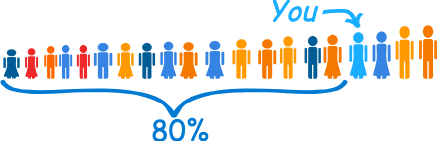

In [68]:
df[df.Country=='United Kingdom'].UnitPrice.describe(percentiles=[0.1, 0.25, 0.50, 0.90, 0.95, 0.99])

count    495478.000000
mean          4.532422
std          99.315438
min      -11062.060000
10%           0.650000
25%           1.250000
50%           2.100000
90%           7.950000
95%           9.950000
99%          16.950000
max       38970.000000
Name: UnitPrice, dtype: float64

**Завдання 3**:
В наступних кількох завданнях ми будемо будувати гістограму для цін на товари в Франції. Для початку, виведіть з допомогою pandas опис розподілу цін на товари у Франції з персентилями 0.1, 0.2, 0.5, 0.8, 0.9, 0.99. Запамʼятайте значення, яке відповідає 99-ому персентилю! Воно нам знадобиться.

<details>
<summary>Натисніть тут аби побачити розвʼязок</summary>

```python
df[df.Country=='France'].UnitPrice.describe(percentiles=[0.1, 0.2, 0.5, 0.9, 0.99])
```
</details>

<ipython-input-69-6d03ce627308>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Country=='United Kingdom'][df.UnitPrice>=0][df.UnitPrice<=17].UnitPrice.hist();


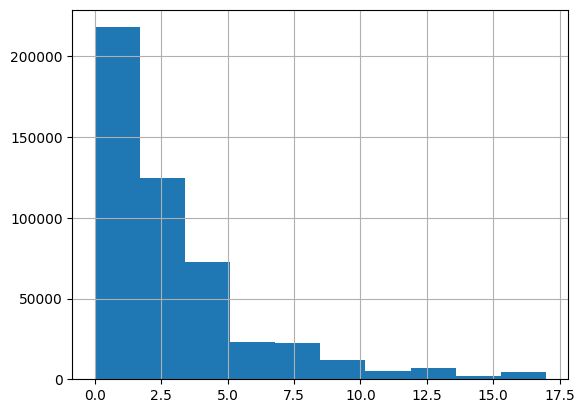

In [69]:
df[df.Country=='United Kingdom'][df.UnitPrice>=0][df.UnitPrice<=17].UnitPrice.hist();

Зовсім інша справа! Тут вже можна щось проаналізувати! Тільки було б непогано підписати вісі. Але можливо seaborn зробить це за нас.

До речі, аби прибрати ті попередженя, можемо прописувати фільтри наступним чином (трошки більше символів, але теж можна).

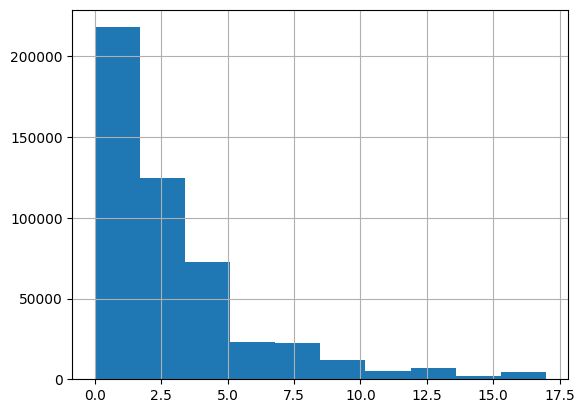

In [70]:
df[(df.Country=='United Kingdom') & (df.UnitPrice>=0) & (df.UnitPrice<=17)].UnitPrice.hist();

**Завдання 4**:
З допомогою **pandas** виведіть гістограму значень цін на товари у Франції. Обмежте значення цін на товари 99тим персентилем (візьмість значення з Завдання 3) з допомогою фільтрів.
<details>
<summary>Натисніть тут аби побачити розвʼязок</summary>

```python
df[(df.Country=='France') & (df.UnitPrice<=18)].UnitPrice.hist();
```
</details>

Як же буде виглядати гістограма з seaborn.

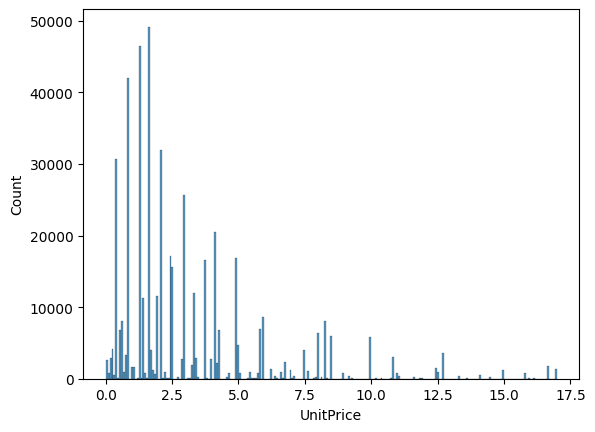

In [72]:
sns.histplot(data=df[(df.Country=='United Kingdom') & (df.UnitPrice>=0) & (df.UnitPrice<=17)], x='UnitPrice');

Бачим, що seaborn зробив нам автоматично підписи осей, але також обрав забагато бінів (проміжків) за замовчанням. Та це ми моежмо коригувати.

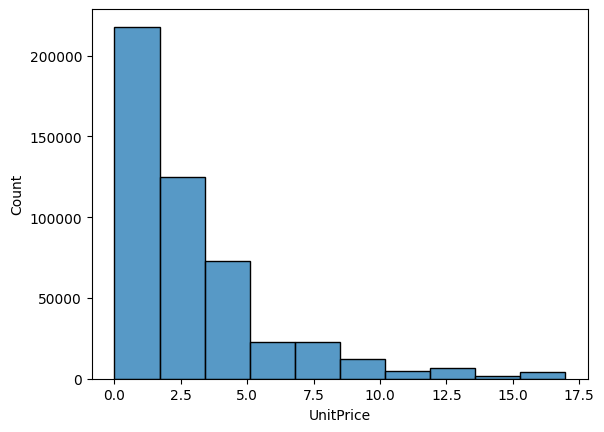

In [78]:
sns.histplot(data=df[(df.Country=='United Kingdom') & (df.UnitPrice>=0) & (df.UnitPrice<=17)], x='UnitPrice', bins=10);

<Axes: >

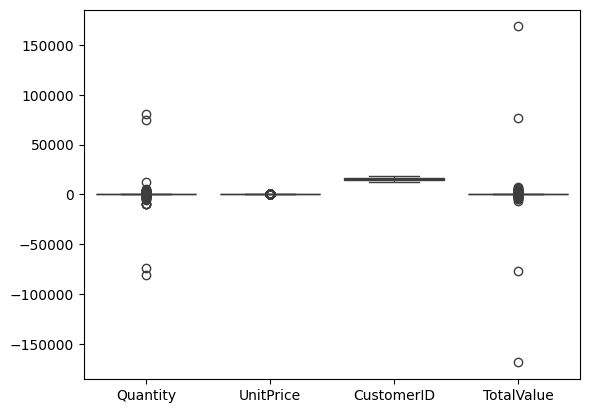

In [81]:
sns.boxplot(data=df[(df.Country=='United Kingdom') & (df.UnitPrice>=0) & (df.UnitPrice<=17)])

<Axes: ylabel='UnitPrice'>

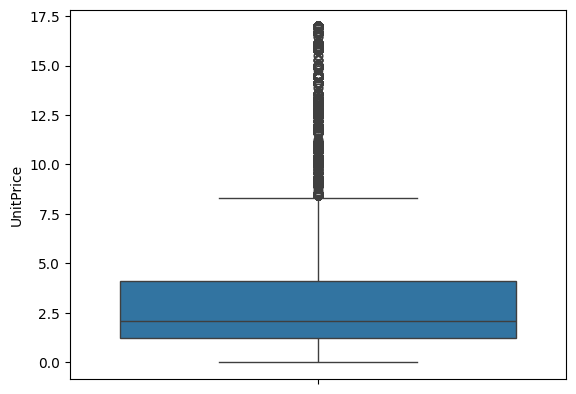

In [82]:
sns.boxplot(data=df[(df.Country=='United Kingdom') & (df.UnitPrice>=0) & (df.UnitPrice<=17)], y='UnitPrice')

**Завдання 5**:
З допомогою **seaborn** виведіть гістограму значень цін на товари у Франції. Обмежте значення цін на товари 99тим персентилем (візьмість значення з Завдання 3) з допомогою фільтрів. Встановіть 15 бінів для відображення
<details>
<summary>Натисніть тут аби побачити розвʼязок</summary>

```python
sns.histplot(data=df[(df.Country=='France') & (df.UnitPrice<=18)], x='UnitPrice', bins=15);
```
</details>

Ми можемо на одній фігурі відобразити гістограми за кількома країнами!

In [83]:
df.UnitPrice.describe(percentiles=[.99])

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
50%           2.080000
99%          18.000000
max       38970.000000
Name: UnitPrice, dtype: float64

In [85]:
df.Country.value_counts().index[:3]

Index(['United Kingdom', 'Germany', 'France'], dtype='object')

In [86]:
filter_countries = df.Country.value_counts().index[:3]
df_filitered = df[(df.UnitPrice>=0) & (df.UnitPrice<=18) & (df.Country.isin(filter_countries))]

Документація: https://seaborn.pydata.org/generated/seaborn.histplot.html

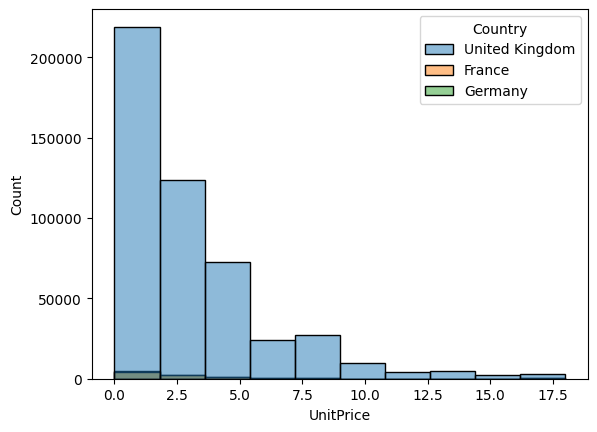

In [87]:
sns.histplot(data=df_filitered, x='UnitPrice', bins=10, hue='Country');

Оскільки значень за United Kingdom значно більше в наборі даних, то ця гістограма своїм масштабом не дощзволяє проаналізувати решту значень. Але ми можемо замість кількості значень вивести щільність розподілу!

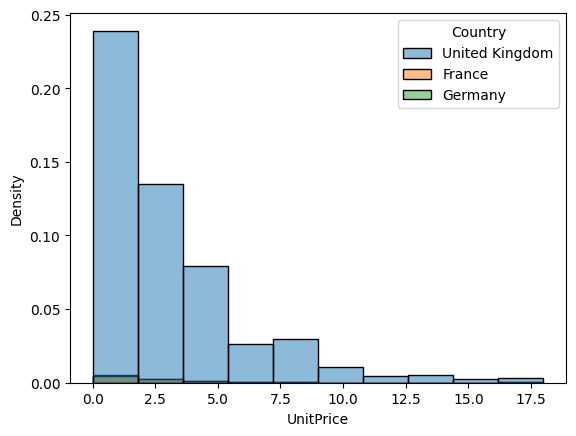

In [91]:
sns.histplot(data=df_filitered, x='UnitPrice', bins=10, hue='Country', stat='density');

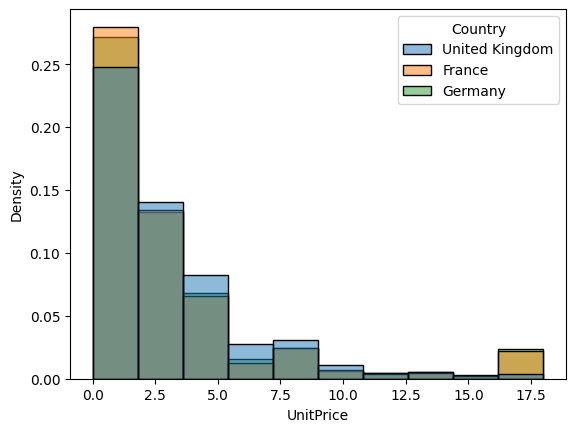

In [88]:
sns.histplot(data=df_filitered, x='UnitPrice', bins=10, hue='Country', stat='density', common_norm=False);

Перестало бути видно будь-що. Але ми можемо використати інший тип графіку!

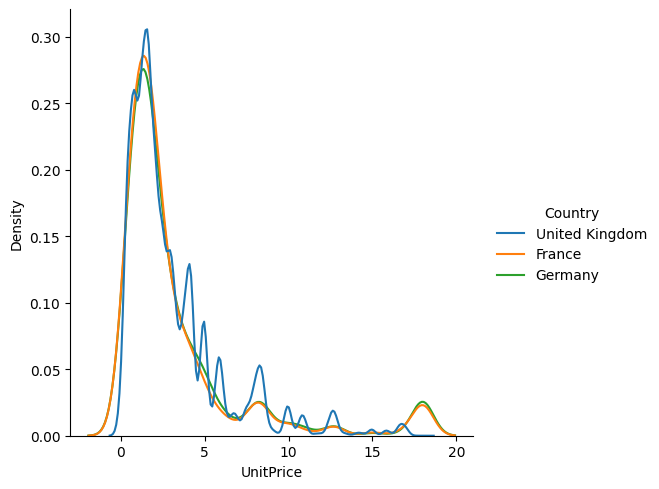

In [89]:
sns.displot(data=df_filitered, x='UnitPrice', hue='Country', kind="kde", common_norm=False);

Отак вже щось видно!

**Завдання 6**:
З допомогою **seaborn** виведіть графік розподілу (displot) значень цін на товари у Австралії, Норвегії і Португалії.
<details>
<summary>Натисніть тут аби побачити розвʼязок</summary>

```python
filter_countries_2 = ['Australia', 'Norway', 'Portugal']
df_filitered_2 = df[(df.UnitPrice>=0) & (df.UnitPrice<=18) & (df.Country.isin(filter_countries_2))]
sns.displot(data=df_filitered_2, x='UnitPrice', hue='Country', kind="kde", common_norm=False);
```
</details>

# Діаграма розсіювання
Цей графік дозволяє досліджувати залежності між ознаками! До цього ми досліджували кожну ознаку окремо. Зараз ми навчимось досліджувати взаємозвʼязок ознак між собою.

In [92]:
df.Quantity.describe(percentiles=[0.99])

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
50%           3.000000
99%         100.000000
max       80995.000000
Name: Quantity, dtype: float64

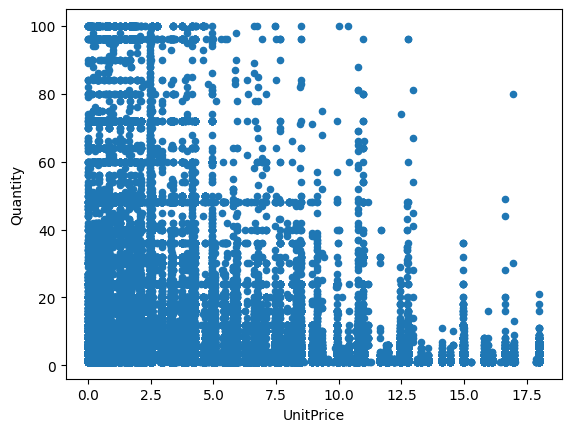

In [95]:
df[(df.UnitPrice>=0) & (df.UnitPrice<=18) & (df.Quantity>=0) & (df.Quantity<=100)].plot.scatter(x='UnitPrice', y='Quantity');

Бачимо, що є тенденція, що дорогих товарів у нас беруть у меншій кількості. Якщо б у нас була моржа (скільки ми заробляємо з кожного товару), то можна було б переглянути, які товари нам найвигідніше мати представленими в магазині.

Загальні правила до інтерпретації діаграм розсіювання.

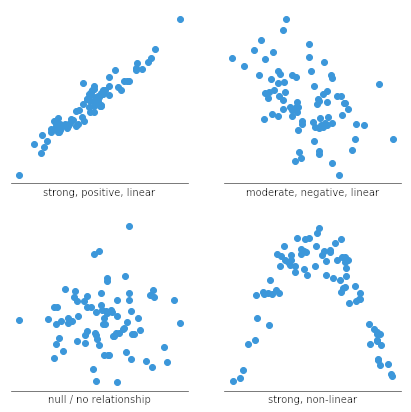

**Завдання 7**:
З допомогою **pandas** виведіть графік розсіювання між UnitPrice та TotalValue у Франції. Використайте обмеження на значення UnitPrice та TotalValue як у попередньому завданні.

<details>
<summary>Натисніть тут аби побачити розвʼязок</summary>

```python
df[(df.UnitPrice>=0) & (df.UnitPrice<=19) & (df.Quantity>=0) & (df.Quantity<=100) & (df.Country=="France")].plot.scatter(x='UnitPrice', y='TotalValue');
```
</details>

## Як обрати візуаліазацію для даних

Вибір правильної візуалізації даних залежить від типу даних, які ви маєте, і від питань, на які ви намагаєтеся знайти відповіді. Ось основні рекомендації щодо вибору між гістограмою, діаграмою розсіювання і лінійним графіком:

### Гістограма

- **Коли використовувати**: Гістограми ідеально підходять для візуалізації розподілу одновимірних даних. Вони допомагають зрозуміти частоту або ймовірність різних діапазонів значень у наборі даних.
- **Тип даних**: Кількісні (неперервні або дискретні) дані.
- **Приклади використання**: Аналіз розподілу росту людей, аналіз доходів, вивчення частоти температур протягом року.

### Діаграма розсіювання

- **Коли використовувати**: Діаграми розсіювання корисні для виявлення зв'язків між двома змінними. Вони можуть допомогти визначити, чи існує кореляція (звʼязок) між змінними, і якщо так, то якого типу ця кореляція (позитивна, негативна, лінійна, не лінійна).
- **Тип даних**: Дві кількісні змінні.
- **Приклади використання**: Аналіз взаємозв'язку між ростом і вагою людини, вивчення кореляції між витратами на рекламу і продажами.

### Лінійний графік

- **Коли використовувати**: Лінійні графіки підходять для відображення змін однієї або кількох змінних протягом часу (з дня у день, або погодинно протягм дня). Вони допомагають відстежувати тенденції, цикли або коливання у даних.
- **Тип даних**: Кількісні дані, які змінюються в часі.
- **Приклади використання**: Відображення зміни середньої температури протягом року, аналіз динаміки акційної ціни, відстеження змін у кількості відвідувачів веб-сайту.

При виборі типу візуалізації важливо також враховувати аудиторію: чи знайомі вони з даними та якого типу інформацію ви хочете їм передати. Чіткість і простота часто краще, ніж складність.

# Як зробити з файлів майстер-клас проєкт в портфоліо

1. Перетворіть файли так, аби розказати істрію про дані. Проявіть творчість, зробіть додатковий аналіз використовуючи те, що ми вивчили на цьому МК
2. Завантажте дані на github або впевніться, що будь-хто може відкрити ваш проєкт за посиланням на Google Colab.
3. Додайте ОПИС і ПОСИЛАННЯ на проєкт в РЕЗЮМЕ.
4. Запостіть в лінкедин, що ви пройшли цей МК і додайте посилання на свої проєкти ще там :)